In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

import bootcampviztools as bt

# Descripción de las Columnas del Dataset

| **Columna**               | **Descripción** |
|---------------------------|----------------|
| `Applicant_ID`            | Identificador único de cada solicitante. |
| `Applicant_Gender`        | Género del solicitante (`M` para masculino, `F` para femenino). |
| `Owned_Car`              | Indica si el solicitante posee un coche (`1` para sí, `0` para no). |
| `Owned_Realty`           | Indica si el solicitante posee una propiedad inmobiliaria (`1` para sí, `0` para no). |
| `Total_Children`         | Número total de hijos del solicitante. |
| `Total_Income`           | Ingreso total anual del solicitante. |
| `Income_Type`            | Tipo de fuente de ingresos del solicitante (por ejemplo, "Working", "State Servant", "Commercial associate"). |
| `Education_Type`         | Nivel de educación del solicitante (por ejemplo, "Higher education", "Secondary education"). |
| `Family_Status`          | Estado civil del solicitante (por ejemplo, "Married", "Single", "Widow"). |
| `Housing_Type`           | Tipo de vivienda en la que reside el solicitante (por ejemplo, "House / apartment", "Municipal apartment"). |
| `Owned_Mobile_Phone`     | Indica si el solicitante posee un teléfono móvil (`1` para sí, `0` para no). |
| `Owned_Work_Phone`       | Indica si el solicitante posee un teléfono de trabajo (`1` para sí, `0` para no). |
| `Owned_Phone`            | Indica si el solicitante posee otro teléfono adicional (`1` para sí, `0` para no). |
| `Owned_Email`            | Indica si el solicitante posee un correo electrónico (`1` para sí, `0` para no). |
| `Job_Title`              | Cargo o título profesional del solicitante (por ejemplo, "Accountants", "Laborers", "Managers"). |
| `Total_Family_Members`   | Número total de miembros en la familia del solicitante. |
| `Applicant_Age`          | Edad del solicitante en años. |
| `Years_of_Working`       | Años de experiencia laboral del solicitante. |
| `Total_Bad_Debt`         | Cantidad total de deudas incobrables del solicitante. |
| `Total_Good_Debt`        | Cantidad total de deudas bien gestionadas del solicitante. |
| `Status`                 | Estado del solicitante (`1` para aprobado, `0` para rechazado). |

In [34]:
data = pd.read_csv("./data/Application_Data.csv")

In [35]:
df = data.copy()

In [36]:
df.head(5)

,Applicant_ID,Applicant_Gender,Owned_Car,Owned_Realty,Total_Children,Total_Income,Income_Type,Education_Type,Family_Status,Housing_Type,...,Owned_Work_Phone,Owned_Phone,Owned_Email,Job_Title,Total_Family_Members,Applicant_Age,Years_of_Working,Total_Bad_Debt,Total_Good_Debt,Status
0,5008806,M,1,1,0,112500,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,...,0,0,0,Security staff ...,2,59,4,0,30,1
1,5008808,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0,1,1,Sales staff ...,1,53,9,0,5,1
2,5008809,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0,1,1,Sales staff ...,1,53,9,0,5,1
3,5008810,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0,1,1,Sales staff ...,1,53,9,0,27,1
4,5008811,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0,1,1,Sales staff ...,1,53,9,0,39,1


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25128 entries, 0 to 25127
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Applicant_ID          25128 non-null  int64 
 1   Applicant_Gender      25128 non-null  object
 2   Owned_Car             25128 non-null  int64 
 3   Owned_Realty          25128 non-null  int64 
 4   Total_Children        25128 non-null  int64 
 5   Total_Income          25128 non-null  int64 
 6   Income_Type           25128 non-null  object
 7   Education_Type        25128 non-null  object
 8   Family_Status         25128 non-null  object
 9   Housing_Type          25128 non-null  object
 10  Owned_Mobile_Phone    25128 non-null  int64 
 11  Owned_Work_Phone      25128 non-null  int64 
 12  Owned_Phone           25128 non-null  int64 
 13  Owned_Email           25128 non-null  int64 
 14  Job_Title             25128 non-null  object
 15  Total_Family_Members  25128 non-null

In [38]:
df["Status"].value_counts(normalize=True)

Status
1    0.995185
0    0.004815
Name: proportion, dtype: float64

In [39]:
target = "Status"

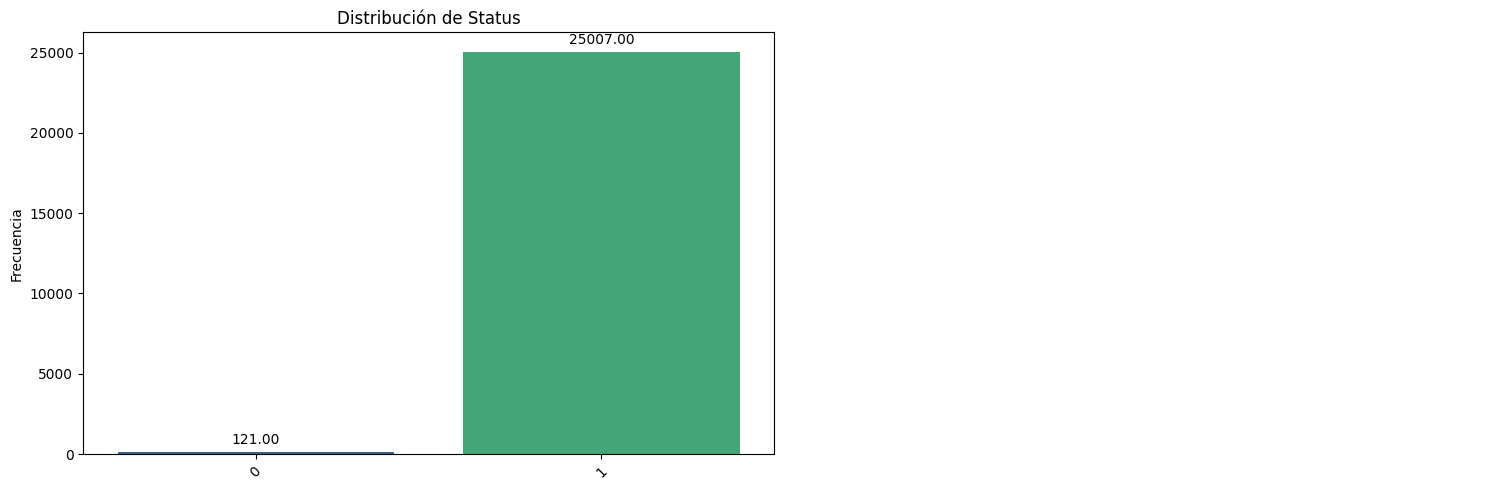

In [40]:
bt.pinta_distribucion_categoricas(df, [target], mostrar_valores= True)

# 2. MiniEDA

## 2.1. Variables Numéricas

In [41]:
df.drop(['Applicant_ID'], axis=1, inplace=True)

In [42]:
numeric_cols = df.select_dtypes(include=['int64']).columns
numeric_cols

Index(['Owned_Car', 'Owned_Realty', 'Total_Children', 'Total_Income',
       'Owned_Mobile_Phone', 'Owned_Work_Phone', 'Owned_Phone', 'Owned_Email',
       'Total_Family_Members', 'Applicant_Age', 'Years_of_Working',
       'Total_Bad_Debt', 'Total_Good_Debt', 'Status'],
      dtype='object')

In [43]:
corr = np.abs(df[numeric_cols].corr()[target]).sort_values(ascending=False)
corr

Status                  1.000000
Total_Bad_Debt          0.458497
Total_Good_Debt         0.074516
Years_of_Working        0.021382
Total_Children          0.011036
Applicant_Age           0.010078
Total_Family_Members    0.010056
Owned_Email             0.009203
Owned_Work_Phone        0.005318
Owned_Phone             0.004323
Total_Income            0.003482
Owned_Realty            0.002716
Owned_Car               0.001604
Owned_Mobile_Phone           NaN
Name: Status, dtype: float64

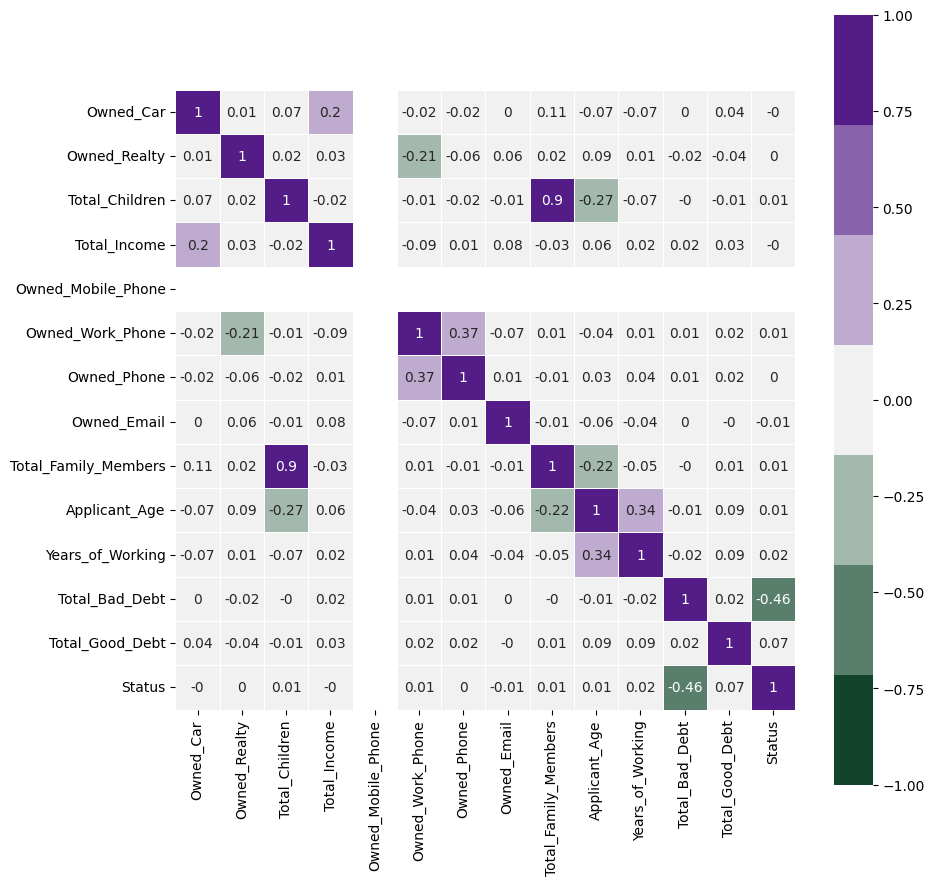

In [44]:
plt.figure(figsize=(10,10))
sns.heatmap(np.round(df[numeric_cols].corr(), 2),
            vmin=-1,
            vmax=1,
            annot=True,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),
            square=True,
            linewidths=.5);

In [45]:
# Features con menos de 0.05 de correlación vs el target
bad_corr_feat = corr[corr < 0.01].index.values
good_corr_feat = corr[corr > 0.01].index.values

# Filtramos y eliminamos las columnas(Features) con con menos de 0.05 de correlación vs el target
df.drop(columns=bad_corr_feat, inplace=True)

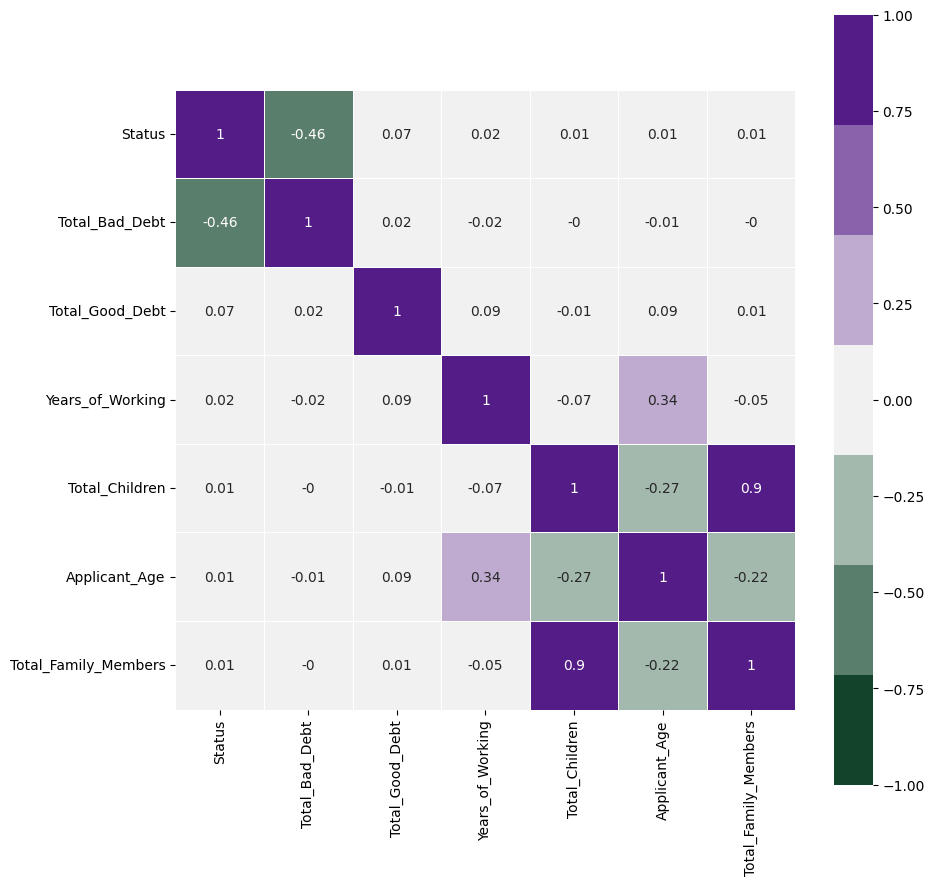

In [46]:
plt.figure(figsize=(10,10))
sns.heatmap(np.round(df[good_corr_feat].corr(), 2),
            vmin=-1,
            vmax=1,
            annot=True,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),
            square=True,
            linewidths=.5);

In [47]:
features_num = [col for col in good_corr_feat if target not in col]
features_num

['Total_Bad_Debt',
 'Total_Good_Debt',
 'Years_of_Working',
 'Total_Children',
 'Applicant_Age',
 'Total_Family_Members']

array([[<Axes: title={'center': 'Total_Bad_Debt'}>,
        <Axes: title={'center': 'Total_Good_Debt'}>],
       [<Axes: title={'center': 'Years_of_Working'}>,
        <Axes: title={'center': 'Total_Children'}>],
       [<Axes: title={'center': 'Applicant_Age'}>,
        <Axes: title={'center': 'Total_Family_Members'}>]], dtype=object)

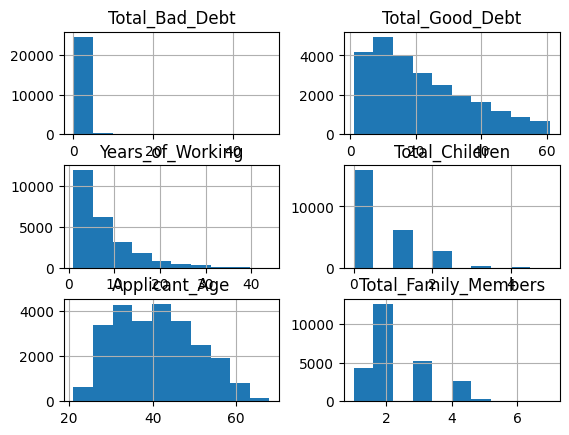

In [48]:
df[features_num].hist()

In [49]:
df[features_num].describe()

,Total_Bad_Debt,Total_Good_Debt,Years_of_Working,Total_Children,Applicant_Age,Total_Family_Members
count,25128.000000,25128.000000,25128.000000,25128.000000,25128.000000,25128.000000
mean,0.333095,21.057545,7.690903,0.509472,40.995503,2.291309
std,1.569448,14.735347,6.415007,0.762937,9.552832,0.928871
min,0.000000,1.000000,1.000000,0.000000,21.000000,1.000000
25%,0.000000,9.000000,3.000000,0.000000,33.000000,2.000000
50%,0.000000,18.000000,6.000000,0.000000,40.000000,2.000000
75%,0.000000,31.000000,10.000000,1.000000,48.000000,3.000000
max,49.000000,61.000000,44.000000,5.000000,68.000000,7.000000


In [50]:
features_num_log = ["Total_Good_Debt", "Years_of_Working", "Applicant_Age", "Total_Family_Members"]

array([[<Axes: title={'center': 'Total_Good_Debt'}>,
        <Axes: title={'center': 'Years_of_Working'}>],
       [<Axes: title={'center': 'Applicant_Age'}>,
        <Axes: title={'center': 'Total_Family_Members'}>]], dtype=object)

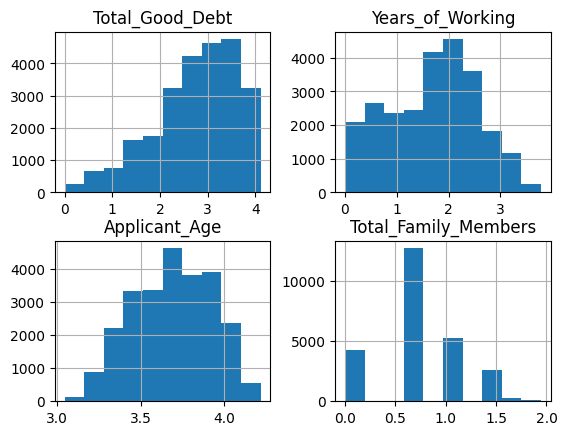

In [51]:
for col in features_num_log: # Aplicamos log a las features buscando una forma más normalizada
    df[col] = df[col].apply(np.log) 
df[features_num_log].hist()

In [52]:
df[features_num_log].describe()

,Total_Good_Debt,Years_of_Working,Applicant_Age,Total_Family_Members
count,25128.000000,25128.000000,25128.000000,25128.000000
mean,2.737973,1.707275,3.685857,0.745099
std,0.873772,0.854180,0.236674,0.419558
min,0.000000,0.000000,3.044522,0.000000
25%,2.197225,1.098612,3.496508,0.693147
50%,2.890372,1.791759,3.688879,0.693147
75%,3.433987,2.302585,3.871201,1.098612
max,4.110874,3.784190,4.219508,1.945910


In [53]:
features_num = ["Total_Bad_Debt", "Total_Good_Debt", "Years_of_Working", "Total_Children", "Applicant_Age", "Total_Family_Members"]

In [54]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 
scaler.fit(df[features_num]) 
df[features_num] = pd.DataFrame(scaler.transform(df[features_num]), columns = features_num)

In [55]:
df.describe()

,Total_Children,Owned_Mobile_Phone,Total_Family_Members,Applicant_Age,Years_of_Working,Total_Bad_Debt,Total_Good_Debt,Status
count,2.512800e+04,25128.0,2.512800e+04,2.512800e+04,2.512800e+04,2.512800e+04,2.512800e+04,25128.000000
mean,-2.855970e-17,1.0,-6.588525e-17,-7.979750e-16,1.582094e-16,-1.032108e-17,-4.032290e-16,0.995185
std,1.000020e+00,0.0,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,0.069227
min,-6.677899e-01,1.0,-1.775950e+00,-2.709828e+00,-1.998768e+00,-2.122410e-01,-3.133573e+00,0.000000
25%,-6.677899e-01,1.0,-1.238278e-01,-8.000572e-01,-7.125830e-01,-2.122410e-01,-6.188795e-01,1.000000
50%,-6.677899e-01,1.0,-1.238278e-01,1.277112e-02,9.890948e-02,-2.122410e-01,1.744179e-01,1.000000
75%,6.429603e-01,1.0,8.426019e-01,7.831338e-01,6.969515e-01,-2.122410e-01,7.965784e-01,1.000000
max,5.885961e+00,1.0,2.862144e+00,2.254833e+00,2.431520e+00,3.100955e+01,1.571266e+00,1.000000


## 2.1. Variables Categóricas

In [56]:
features_cat = df.select_dtypes(include=['object']).columns
features_cat

Index(['Applicant_Gender', 'Income_Type', 'Education_Type', 'Family_Status',
       'Housing_Type', 'Job_Title'],
      dtype='object')

In [57]:
df[features_cat]

,Applicant_Gender,Income_Type,Education_Type,Family_Status,Housing_Type,Job_Title
0,M,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,Security staff ...
1,F,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,Sales staff ...
2,F,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,Sales staff ...
3,F,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,Sales staff ...
4,F,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,Sales staff ...
...,...,...,...,...,...,...
25123,F,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,Core staff ...
25124,F,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,Core staff ...
25125,F,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,Core staff ...
25126,F,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,Core staff ...


In [58]:
from sklearn.preprocessing import OneHotEncoder
df = pd.get_dummies(df, columns=features_cat,dtype=int)
df.head(5)

,Total_Children,Owned_Mobile_Phone,Total_Family_Members,Applicant_Age,Years_of_Working,Total_Bad_Debt,Total_Good_Debt,Status,Applicant_Gender_F,Applicant_Gender_M,...,Job_Title_Laborers,Job_Title_Low-skill Laborers,Job_Title_Managers,Job_Title_Medicine staff,Job_Title_Private service staff,Job_Title_Realty agents,Job_Title_Sales staff,Job_Title_Secretaries,Job_Title_Security staff,Job_Title_Waiters/barmen staff
0,-0.66779,1,-0.123828,1.654966,-0.375783,-0.212241,0.759051,1,0,1,...,0,0,0,0,0,0,0,0,1,0
1,-0.66779,1,-1.775950,1.201822,0.573602,-0.212241,-1.291593,1,1,0,...,0,0,0,0,0,0,1,0,0,0
2,-0.66779,1,-1.775950,1.201822,0.573602,-0.212241,-1.291593,1,1,0,...,0,0,0,0,0,0,1,0,0,0
3,-0.66779,1,-1.775950,1.201822,0.573602,-0.212241,0.638467,1,1,0,...,0,0,0,0,0,0,1,0,0,0
4,-0.66779,1,-1.775950,1.201822,0.573602,-0.212241,1.059323,1,1,0,...,0,0,0,0,0,0,1,0,0,0


# 1. División en train y test

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(target, axis=1), 
                                                    df[target],
                                                    test_size=0.2,
                                                    random_state=42)


In [60]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(20102, 48)
(20102,)
(5026, 48)
(5026,)


## Sobremuestreo o Over-Sampling - SMOTE

In [61]:
from imblearn.over_sampling import SMOTE

In [62]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [63]:
y_train_smote.value_counts(True)

Status
1    0.5
0    0.5
Name: proportion, dtype: float64

In [64]:
print(X_train_smote.shape)
print(y_train_smote.shape)

(40014, 48)
(40014,)
